In [57]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# # Mount Google Drive
# drive.mount('/content/drive')

# # Load dataset
# file_path = '/content/drive/My Drive/psd/hujan/hujan.xlsx'
# data = pd.read_excel(file_path)

import pandas as pd

url = 'https://raw.githubusercontent.com/Bima-010/psd/main/datasets/hujan.xlsx'

data = pd.read_excel(url)

In [37]:
# Mengonversi kolom 'Tanggal' menjadi datetime dengan format yang sesuai (DD-MM-YYYY)
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y')

# Menangani nilai yang tidak terukur dan tidak dilakukan pengukuran
data['RR'] = data['RR'].replace([8888, 9999], np.nan)

# Impute missing values dengan nilai rata-rata kolom
imputer = SimpleImputer(strategy='mean')
data['RR'] = imputer.fit_transform(data[['RR']])

# Menangani nilai 0 (terjadi hujan)
# 0 dianggap valid sebagai indikasi tidak ada hujan, sehingga tidak perlu diubah


In [38]:
def create_supervised_data(data, target_column, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[target_column].iloc[i:(i + window_size)].values)  # Menggunakan nilai sebelumnya
        y.append(data[target_column].iloc[i + window_size])  # Nilai target (rain rate) untuk prediksi
    return np.array(X), np.array(y)

# Tentukan window size (misalnya 5 hari terakhir)
window_size = 5

# Buat X dan y
X, y = create_supervised_data(data, target_column='RR', window_size=window_size)

# Menampilkan ukuran X dan y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (330, 5)
Shape of y: (330,)


In [39]:
# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])  # Menyusun ulang X agar bisa dinormalisasi
X_normalized = scaler.fit_transform(X_reshaped)
X_normalized = X_normalized.reshape(X.shape)

# Menampilkan beberapa nilai setelah normalisasi
print("Sample of normalized data:")
print(X_normalized[:5])


Sample of normalized data:
[[0.00361446 0.         0.02391668 0.02710843 0.        ]
 [0.         0.02391668 0.02710843 0.         0.        ]
 [0.02391668 0.02710843 0.         0.         0.00722892]
 [0.02710843 0.         0.         0.00722892 0.02391668]
 [0.         0.         0.00722892 0.02391668 0.        ]]


In [40]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, shuffle=False)

# Menampilkan ukuran X_train dan X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (264, 5)
Shape of X_test: (66, 5)


In [41]:
# Inisialisasi model KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Melatih model
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Prediksi pada data testing
y_pred = knn.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluasi menggunakan MAE dan MAPE
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Mengonversi MAPE ke persen

# Menampilkan hasil evaluasi
print("MAE (Mean Absolute Error):", mae)
print("MAPE (Mean Absolute Percentage Error):", mape, "%")


MAE (Mean Absolute Error): 4.122359527478171
MAPE (Mean Absolute Percentage Error): 7.634255974810321e+17 %


RMSE (Root Mean Squared Error): 9.978456241580428

Perbandingan Actual vs Predicted:
   Actual  Predicted
0     1.0   0.794034
1     2.0   0.794034
2     0.0   0.000000
3     0.0   4.754034
4     0.0   1.634034


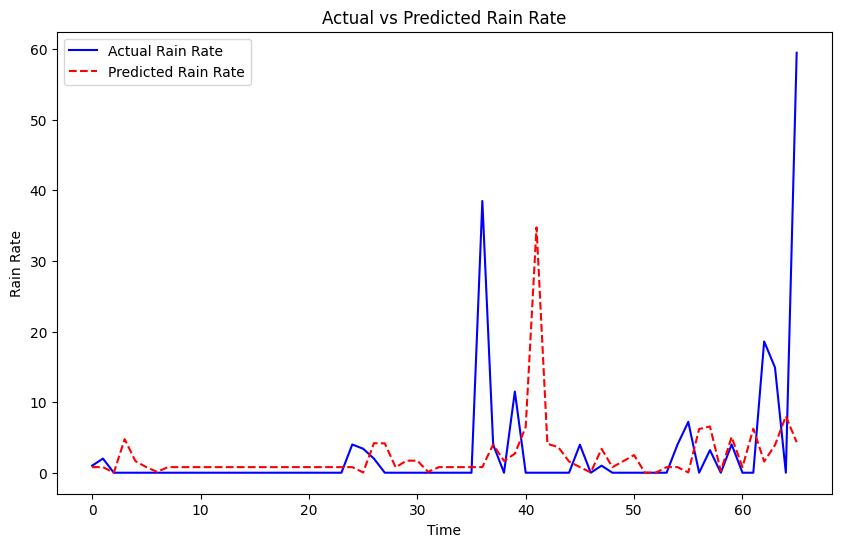

In [42]:
from sklearn.metrics import mean_squared_error

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil RMSE
print("RMSE (Root Mean Squared Error):", rmse)

# Menampilkan perbandingan antara nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPerbandingan Actual vs Predicted:")
print(comparison_df.head())

# Menampilkan grafik perbandingan antara nilai aktual dan prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Rain Rate', color='blue')
plt.plot(y_pred, label='Predicted Rain Rate', color='red', linestyle='--')
plt.title('Actual vs Predicted Rain Rate')
plt.xlabel('Time')
plt.ylabel('Rain Rate')
plt.legend()
plt.show()


In [44]:
# Importing required libraries
import pandas as pd
import numpy as np

# # Load data dari Google Drive (ubah path sesuai dengan file Anda)
# from google.colab import drive
# drive.mount('/content/drive')

# # Membaca dataset
# data = pd.read_excel('/content/drive/My Drive/psd/hujan/hujan.xlsx')

import pandas as pd

url = 'https://raw.githubusercontent.com/Bima-010/psd/main/datasets/hujan.xlsx'

data = pd.read_excel(url)

# Preprocessing data
# Mengonversi kolom 'Tanggal' menjadi datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')

# Mengisi nilai yang hilang dengan 0 (untuk data hujan 0 mm/h)
data['RR'] = data['RR'].replace(8888, np.nan).replace(9999, np.nan)
data['RR'].fillna(0, inplace=True)

# Menampilkan data setelah preprocessing
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Tanggal   RR
0 2024-01-01  0.6
1 2024-02-01  0.0
2 2024-03-01  0.0
3 2024-04-01  4.5
4 2024-05-01  0.0


<ipython-input-44-0984e0ca3825>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RR'].fillna(0, inplace=True)


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[['RR']])

# Menampilkan hasil normalisasi data
print("Sample of normalized data:")
print(data_normalized[:5])


Sample of normalized data:
[[0.00361446]
 [0.        ]
 [0.        ]
 [0.02710843]
 [0.        ]]


In [46]:
# Membuat fungsi sliding window untuk membuat data supervised
def create_supervised_data(data, target_column, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])  # Menggunakan 'RR' sebagai fitur
        y.append(data[i + window_size, 0])     # Target adalah nilai rain rate di masa depan
    return np.array(X), np.array(y)

# Menentukan ukuran window
window_size = 5

# Membuat data supervised
X, y = create_supervised_data(data_normalized, 'RR', window_size)

# Menampilkan bentuk data X dan y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (330, 5)
Shape of y: (330,)


In [47]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Menampilkan dimensi data train dan test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (264, 5)
Shape of X_test: (66, 5)


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Melatih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Menampilkan model
print(rf_model)


RandomForestRegressor(random_state=42)


In [49]:
# Membuat prediksi
y_pred = rf_model.predict(X_test)

# Menampilkan beberapa nilai prediksi
print("Predicted values:", y_pred[:5])


Predicted values: [0.00199083 0.01411306 0.01680556 0.06088554 0.012     ]


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluasi Model
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE (Root Mean Squared Error):", rmse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print("MAE (Mean Absolute Error):", mae)


RMSE (Root Mean Squared Error): 0.06186596164783071
MAE (Mean Absolute Error): 0.027449267549093315


In [51]:
# Membuat DataFrame untuk perbandingan antara nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan perbandingan beberapa nilai
print("\nPerbandingan Actual vs Predicted:")
print(comparison_df.head())



Perbandingan Actual vs Predicted:
     Actual  Predicted
0  0.006024   0.001991
1  0.012048   0.014113
2  0.000000   0.016806
3  0.000000   0.060886
4  0.000000   0.012000


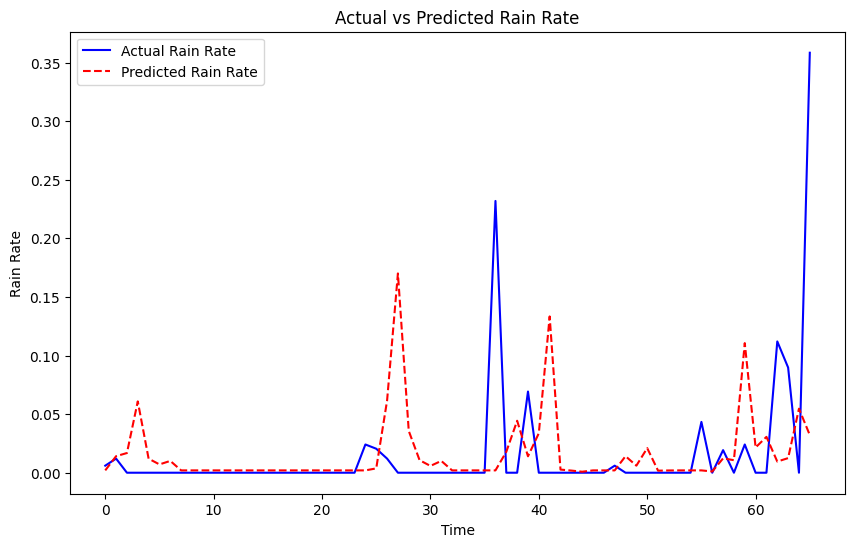

In [52]:
import matplotlib.pyplot as plt

# Plotting grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Rain Rate', color='blue')
plt.plot(y_pred, label='Predicted Rain Rate', color='red', linestyle='--')
plt.title('Actual vs Predicted Rain Rate')
plt.xlabel('Time')
plt.ylabel('Rain Rate')
plt.legend()
plt.show()


In [56]:
import joblib

# Menyimpan model
joblib.dump(rf_model, 'rain_rate_rf_model.pkl')


['rain_rate_rf_model.pkl']